In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
house_data= pd.read_csv('housetrain.csv')

In [3]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# checking missing values

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
house_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
house_data.shape

(1460, 81)

<AxesSubplot:>

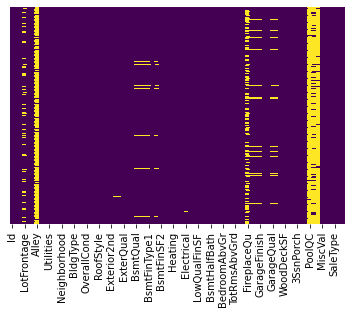

In [7]:
sns.heatmap(house_data.isnull(),yticklabels=False,cbar=False,cmap= 'viridis')

In [8]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
house_data['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45.0       3
130.0      3
174.0      2

In [10]:
house_data['LotFrontage']=house_data['LotFrontage'].fillna(house_data['LotFrontage'].mean())

In [11]:
miss_features = ['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

In [12]:
for feature in miss_features:
    print(feature,'\n',house_data[feature].value_counts())

MasVnrType 
 None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
MasVnrArea 
 0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0       3
85.0        3
272.0       3
226.0       3
174.0       3
240.0       3
186.0       3
169.0       3
148.0       3
350.0       3
128.0       3
176.0       3
166.0       3
116.0       3
136.0       3
312.0       3
256.0       3
145.0       3
74.0        3
4

In [13]:
miss_features.remove('GarageYrBlt')

In [14]:
miss_features

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [15]:
for column in miss_features:
    house_data[column]=house_data[column].fillna(house_data[column].mode()[0])

In [16]:
house_data.drop(['Id','Alley','PoolQC','Fence','MiscFeature','GarageYrBlt'],axis=1,inplace=True)

In [17]:
house_data.shape

(1460, 75)

<AxesSubplot:>

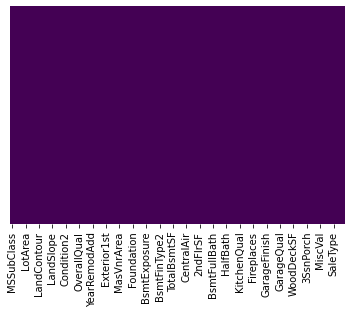

In [18]:
sns.heatmap(house_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
house_datatest=pd.read_csv('housetest.csv')

In [20]:
house_datatest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Missing values

In [21]:
house_datatest.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [22]:
house_datatest['LotFrontage'].value_counts()

60.0     133
80.0      68
70.0      63
50.0      60
75.0      52
65.0      49
85.0      36
63.0      30
24.0      30
21.0      27
68.0      25
74.0      24
64.0      24
90.0      23
72.0      22
62.0      22
78.0      21
82.0      16
73.0      15
59.0      14
57.0      14
56.0      14
76.0      14
53.0      14
52.0      14
100.0     12
88.0      12
51.0      12
81.0      12
43.0      11
66.0      11
79.0      11
35.0      10
48.0      10
58.0      10
67.0      10
44.0      10
110.0      9
69.0       9
61.0       9
84.0       9
42.0       8
41.0       8
95.0       8
91.0       8
83.0       8
120.0      7
71.0       7
45.0       7
55.0       7
34.0       6
96.0       6
87.0       6
105.0      6
102.0      6
94.0       6
77.0       6
93.0       5
92.0       5
86.0       5
30.0       5
39.0       5
40.0       4
107.0      4
89.0       4
98.0       4
54.0       4
38.0       3
26.0       3
108.0      3
47.0       3
106.0      3
113.0      3
112.0      3
32.0       3
125.0      3
97.0       3

In [23]:
house_datatest['LotFrontage']=house_datatest['LotFrontage'].fillna(house_datatest['LotFrontage'].mean())

In [24]:
test_features = ['Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','SaleType']

In [25]:
test_features.remove('GarageYrBlt')

In [26]:
for test_column in test_features:
    house_datatest[test_column]=house_datatest[test_column].fillna(house_datatest[test_column].mode()[0])

<AxesSubplot:>

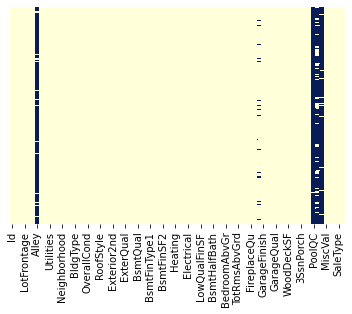

In [27]:
sns.heatmap(house_datatest.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [28]:
house_datatest.drop(['Id','Alley','PoolQC','Fence','MiscFeature','GarageYrBlt'],axis=1,inplace=True)

<AxesSubplot:>

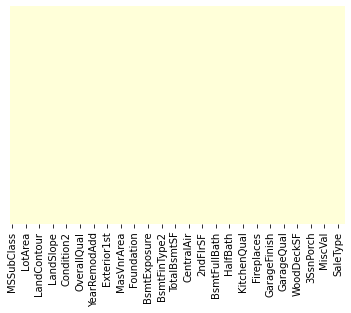

In [29]:
sns.heatmap(house_datatest.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [30]:
house_datatest.shape

(1459, 74)

In [31]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [32]:
def mult_col_onehot_encoding(mult_cat_features):
    df=fulldata
    i=0
    for cat_features in mult_cat_features:
        print(cat_features)
        df1= pd.get_dummies(fulldata[cat_features],drop_first=True)
        fulldata.drop([cat_features],axis=1,inplace=True)
        if i==0:
            df=df1.copy()
        else:
            df=pd.concat([df,df1],axis=1)
        i=i+1
    df=pd.concat([fulldata,df],axis=1)
    
    return df
        

In [33]:
main_HData=house_data.copy()

In [34]:
fulldata=pd.concat([house_data,house_datatest],axis=0)

In [35]:
fulldata.shape

(2919, 75)

In [36]:
fulldata=mult_col_onehot_encoding(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [37]:
fulldata.shape

(2919, 236)

In [38]:
fulldata = fulldata.loc[:,~fulldata.columns.duplicated()]

In [39]:
fulldata.shape

(2919, 176)

In [40]:
fulldata.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [41]:
dftrain=fulldata.iloc[:1460,:]
dftest=fulldata.iloc[1460:,:]

In [42]:
dftest.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\karan rawat\.conda\envs\myenv\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
dftest.shape

(1459, 175)

In [44]:
X_train=dftrain.drop(['SalePrice'],axis=1)
y_train=dftrain['SalePrice']

In [45]:
X_train.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
FV               0
RH               0
RL               0
RM               0
Pave             0
IR2              0
IR3              0
Reg              0
HLS              0
Low              0
Lvl              0
NoSeWa           0
CulDSac          0
FR2              0
FR3              0
Inside           0
Mod              0
Sev         

In [46]:
y_train.isnull().sum()

0

In [53]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=500)
random_forest.fit(X_train, y_train)
print(round(random_forest.score(X_train, y_train) * 100, 2))


98.09


In [54]:
y_pred = random_forest.predict(dftest)

In [55]:
y_pred

array([129581.614, 155334.228, 183059.342, ..., 155590.632, 114722.75 ,
       232492.202])

In [58]:
from xgboost import XGBRegressor

XGBmodel = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
XGBmodel.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_train, y_train)], 
             verbose=False)
print(round(XGBmodel.score(X_train,y_train)* 100,2))

99.99


In [59]:
y_pred = XGBmodel.predict(dftest)
y_pred

array([127800.84, 155831.81, 184772.48, ..., 173232.78, 112152.6 ,
       226114.72], dtype=float32)